#### 1. Import nltk and download the ‘stopwords’ and ‘punkt’ packages
Difficulty Level : L1

Q. Import nltk and necessary packages

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stop')
nltk.download('stopwords')

#### 2. Import spacy and load the language model
Difficulty Level : L1

Q. Import spacy library and load ‘en_core_web_sm’ model for english language. Load ‘xx_ent_wiki_sm’ for multi language support.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp

#### 3. How to tokenize a given text?
Difficulty Level : L1

Q. Print the tokens of the given text document

In [ ]:
text="Last week, the University of Cambridge shared its own research that shows if everyone wears a mask outside home,dreaded ‘second wave’ of the pandemic can be avoided."

Desired Output :
```
Last
week
,
the
University
of
Cambridge
shared
...(truncated)...
```

In [ ]:
# Method 1
# Tokeniation with nltk
import nltk
tokens=nltk.word_tokenize(text)
for token in tokens:
  print(token)

In [ ]:
# Method 2
# Tokenization with spaCy
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)
for token in doc:
  print(token.text)

#### 4. How to get the sentences of a text document?
Difficulty Level : L1

Q. Print the sentences of the given text document

In [ ]:
text="""The outbreak of coronavirus disease 2019 (COVID-19) has created a global health crisis that has had a deep impact on the way we perceive our world and our everyday lives. Not only the rate of contagion and patterns of transmission threatens our sense of agency, but the safety measures put in place to contain the spread of the virus also require social distancing by refraining from doing what is inherently human, which is to find solace in the company of others. Within this context of physical threat, social and physical distancing, as well as public alarm, what has been (and can be) the role of the different mass media channels in our lives on individual, social and societal levels? Mass media have long been recognized as powerful forces shaping how we experience the world and ourselves. This recognition is accompanied by a growing volume of research, that closely follows the footsteps of technological transformations (e.g. radio, movies, television, the internet, mobiles) and the zeitgeist (e.g. cold war, 9/11, climate change) in an attempt to map mass media major impacts on how we perceive ourselves, both as individuals and citizens. Are media (broadcast and digital) still able to convey a sense of unity reaching large audiences, or are messages lost in the noisy crowd of mass self-communication? """

Desired Output :
```
The outbreak of coronavirus disease 2019 (COVID-19) has created a global health crisis that has had a deep impact on the way we perceive our world and our everyday lives.
Not only the rate of contagion and patterns of transmission threatens our sense of agency, but the safety measures put in place to contain the spread of the virus also require social distancing by refraining from doing what is inherently human, which is to find solace in the company of others.
Within this context of physical threat, social and physical distancing, as well as public alarm, what has been (and can be)
...(truncated)...
```

In [ ]:
# Tokenizing the text into sentences with spaCy
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)
for sentence in doc.sents:
  print(sentence)

In [ ]:
# Extracting sentences with nltk
nltk.sent_tokenize(text)

#### 5. How to tokenize a text using the `transformers` package?
Difficulty Level : L1

Q. Tokenize the given text in encoded form using the tokenizer of Huggingface’s transformer package.

In [ ]:
text="I love spring season. I go hiking with my friends"

Desired Output :
```
[101, 1045, 2293, 3500, 2161, 1012, 1045, 2175, 13039, 2007, 2026, 2814, 102]
[CLS] i love spring season. i go hiking with my friends [SEP]
```

In [ ]:
# Import tokenizer from transfromers
from transformers import AutoTokenizer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Initialize the tokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased')

# Encoding with the tokenizer
inputs=tokenizer.encode(text)
print(inputs)
print(tokenizer.decode(inputs))

#### 6. How to tokenize text with stopwords as delimiters?
Difficulty Level : L2

Q. Tokenize the given text with stop words (“is”,”the”,”was”) as delimiters. Tokenizing this way identifies meaningful phrases. Sometimes, useful for topic modeling

In [ ]:
text = "Walter was feeling anxious. He was diagnosed today. He probably is the best person I know."

Expected Output :
```
['Walter',
 'feeling anxious',
 'He',
 'diagnosed today',
 'He probably',
 'best person I know']
```


In [ ]:
# Solution
text = "Walter was feeling anxious. He was diagnosed today. He probably is the best person I know."

stop_words_and_delims = ['was', 'is', 'the', '.', ',', '-', '!', '?']
for r in stop_words_and_delims:
    text = text.replace(r, 'DELIM')

words = [t.strip() for t in text.split('DELIM')]
words_filtered = list(filter(lambda a: a not in [''], words))
words_filtered

##### 7. How to remove stop words in a text ?
Difficulty Level : L1

Q. Remove all the stopwords ( ‘a’ , ‘the’, ‘was’…) from the text

In [ ]:
text="""the outbreak of coronavirus disease 2019 (COVID-19) has created a global health crisis that has had a deep impact on the way we perceive our world and our everyday lives. Not only the rate of contagion and patterns of transmission threatens our sense of agency, but the safety measures put in place to contain the spread of the virus also require social distancing by refraining from doing what is inherently human, which is to find solace in the company of others. Within this context of physical threat, social and physical distancing, as well as public alarm, what has been (and can be) the role of the different mass media channels in our lives on individual, social and societal levels? Mass media have long been recognized as powerful forces shaping how we experience the world and ourselves. This recognition is accompanied by a growing volume of research, that closely follows the footsteps of technological transformations (e.g. radio, movies, television, the internet, mobiles) and the zeitgeist (e.g. cold war, 9/11, climate change) in an attempt to map mass media major impacts on how we perceive ourselves, both as individuals and citizens. Are media (broadcast and digital) still able to convey a sense of unity reaching large audiences, or are messages lost in the noisy crowd of mass self-communication?"""

Desired Output :
```
'outbreak coronavirus disease 2019 ( COVID-19 ) created global health crisis deep impact way perceive world everyday lives . rate contagion patterns transmission threatens sense agency , safety measures place contain spread virus require social distancing refraining inherently human , find solace company . context physical threat , social physical distancing , public alarm , ( ) role different mass media channels lives individual , social societal levels ? Mass media long recognized powerful forces shaping experience world . recognition accompanied growing volume research , closely follows footsteps technological transformations ( e.g. radio , movies , television , internet , mobiles ) zeitgeist ( e.g. cold war , 9/11 , climate change ) attempt map mass media major impacts perceive , individuals citizens . media ( broadcast digital ) able convey sense unity reaching large audiences , messages lost noisy crowd mass self - communication ?'
```

In [ ]:
# Method 1
# Removing stopwords in nltk

import nltk
from nltk.corpus import stopwords
my_stopwords=set(stopwords.words('english'))
new_tokens=[]

# Tokenization using word_tokenize()
all_tokens=nltk.word_tokenize(text)

for token in all_tokens:
  if token not in my_stopwords:
    new_tokens.append(token)


" ".join(new_tokens)

In [ ]:
# Method 2
# Removing stopwords in spaCy

import spacy
nlp = spacy.load("en_core_web_sm")
doc=nlp(text)
new_tokens=[]

# Using is_stop attribute of each token to check if it's a stopword
for token in doc:
  if token.is_stop==False:
    new_tokens.append(token.text)

" ".join(new_tokens)

#### 8. How to add custom stop words in spaCy ?
Difficulty Level : L1

Q. Add the custom stopwords “NIL” and “JUNK” in spaCy and remove the stopwords in below text

In [ ]:
text=" Jonas was a JUNK great guy NIL Adam was evil NIL Martha JUNK was more of a fool "

Expected Output :
```
'Jonas great guy Adam evil Martha fool'
```

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# list of custom stop words
customize_stop_words = ['NIL','JUNK']

# Adding these stop words
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True
doc = nlp(text.strip())
tokens = [token.text for token in doc if not token.is_stop]

" ".join(tokens)

#### 9. How to remove punctuations ?
Difficulty Level : L1

Q. Remove all the punctuations in the given text

In [ ]:
text="The match has concluded !!! India has won the match . Will we fin the finals too ? !"

Desired Output :
```
'The match has concluded India has won the match Will we fin the finals too'
```

In [ ]:
# Method 1
# Removing punctuations in spaCy
import spacy
nlp = spacy.load("en_core_web_sm")

doc=nlp(text)
new_tokens=[]
# Check if a token is a punctuation through is_punct attribute
for token in doc:
  if token.is_punct==False:
    new_tokens.append(token.text)

" ".join(new_tokens)

In [ ]:
# Method 2
# Removing punctuation in nltk with RegexpTokenizer
import nltk
tokenizer=nltk.RegexpTokenizer(r"\w+")

tokens=tokenizer.tokenize(text)
" ".join(tokens)

#### 10. How to perform stemming
Difficulty Level : L2

Q. Perform stemming/ convert each token to it’s root form in the given text

In [ ]:
text= "Dancing is an art. Students should be taught dance as a subject in schools . I danced in many of my school function. Some people are always hesitating to dance."

Desired Output:
```
'danc is an art . student should be taught danc as a subject in school . I danc in mani of my school function . some peopl are alway hesit to danc .'
```

In [ ]:
# Stemming with nltk's PorterStemmer
import nltk
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
stemmed_tokens=[]
for token in nltk.word_tokenize(text):
  stemmed_tokens.append(stemmer.stem(token))

" ".join(stemmed_tokens)

#### 11. How to lemmatize a given text ?
Difficulty Level : L2

Q. Perform lemmatzation on the given text


Hint: Lemmatization Approaches

In [ ]:
text= "Dancing is an art. Students should be taught dance as a subject in schools . I danced in many of my school function. Some people are always hesitating to dance."

Desired Output:
```
'dancing be an art . student should be teach dance as a subject in school . -PRON- dance in many of -PRON- school function . some people be always hesitate to dance .'
```

In [ ]:
# Lemmatization using spacy's lemma_ attribute of token
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)

lemmatized=[token.lemma_ for token in doc]
" ".join(lemmatized)

#### 12. How to extract usernames from emails ?
Difficulty Level : L2

Q. Extract the usernames from the email addresses present in the text

In [ ]:
text= "The new registrations are potter709@gmail.com , elixir101@gmail.com. If you find any disruptions, kindly contact granger111@gamil.com or severus77@gamil.com "

Desired Output :
```
['potter709', 'elixir101', 'granger111', 'severus77']
```

In [ ]:
# Using regular expression to extract usernames
import re  

# \S matches any non-whitespace character 
# @ for as in the Email 
# + for Repeats a character one or more times 
usernames= re.findall('(\S+)@', text)     
print(usernames) 

#### 13. How to find the most common words in the text excluding stopwords
Difficulty Level : L2

Q. Extract the top 10 most common words in the given text excluding stopwords.

In [ ]:
text="""Junkfood - Food that do no good to our body. And there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat. Junk foods have no or very less nutritional value and irrespective of the way they are marketed, they are not healthy to consume.The only reason of their gaining popularity and increased trend of consumption is 
that they are ready to eat or easy to cook foods. People, of all age groups are moving towards Junkfood as it is hassle free and often ready to grab and eat. Cold drinks, chips, noodles, pizza, burgers, French fries etc. are few examples from the great variety of junk food available in the market.
 Junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of Junkfood are kurkure and chips.. cold rings are also source of junk food... they shud nt be ate in high amounts as it results fatal to our body... it cn be eated in a limited extend ... in research its found tht ths junk foods r very dangerous fr our health
Junkfood is very harmful that is slowly eating away the health of the present generation. The term itself denotes how dangerous it is for our bodies. Most importantly, it tastes so good that people consume it on a daily basis. However, not much awareness is spread about the harmful effects of Junkfood .
The problem is more serious than you think. Various studies show that Junkfood impacts our health negatively. They contain higher levels of calories, fats, and sugar. On the contrary, they have very low amounts of healthy nutrients and lack dietary fibers. Parents must discourage their children from consuming junk food because of the ill effects it has on one’s health.
Junkfood is the easiest way to gain unhealthy weight. The amount of fats and sugar in the food makes you gain weight rapidly. However, this is not a healthy weight. It is more of fats and cholesterol which will have a harmful impact on your health. Junk food is also one of the main reasons for the increase in obesity nowadays.
This food only looks and tastes good, other than that, it has no positive points. The amount of calorie your body requires to stay fit is not fulfilled by this food. For instance, foods like French fries, burgers, candy, and cookies, all have high amounts of sugar and fats. Therefore, this can result in long-term illnesses like diabetes and high blood pressure. This may also result in kidney failure."""

Desired Output:
```
text= {Junkfood: 10,
 food: 8,
 good: 5,
 harmful : 3
 body: 1,
 need: 1,

 ...(truncated)
```

In [ ]:
# Creating spacy doc of the text

import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)

# Removal of stop words and punctuations
words=[str(token).strip() for token in doc if token.is_stop==False and token.is_punct==False]

freq_dict={}

# Calculating frequency count
for word in words:
  if word not in freq_dict:
    freq_dict[word]=1
  else:
    freq_dict[word]+=1

print(freq_dict)

#### 14. How to do spell correction in a given text ?
Difficulty Level : L2

Q. Correct the spelling errors in the following text

In [ ]:
text="He is a gret person. He beleives in bod"

Desired Output:
```
text="He is a great person. He believes in god"
```

In [ ]:
# Import textblob
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Using textblob's correct() function
text=TextBlob(text)
print(text.correct())

#### 15. How to tokenize tweets ?
Difficulty Level : L2

Q. Clean the following tweet and tokenize them

In [ ]:
text=" Having lots of fun #goa #vaction #summervacation. Fancy dinner @Beachbay restro :) "

Desired Output :
```
['Having',
 'lots',
 'of',
 'fun',
 'goa',
 'vaction',
 'summervacation',
 'Fancy',
 'dinner',
 'Beachbay',
 'restro']
```

In [ ]:
import re
# Cleaning the tweets
text=re.sub(r'[^\w]', ' ', text)

# Using nltk's TweetTokenizer
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()
tokenizer.tokenize(text)

#### 16. How to extract all the nouns in a text?
Difficulty Level : L2

Q. Extract and print all the nouns present in the below text

In [ ]:
text="James works at Microsoft. She lives in manchester and likes to play the flute"

Desired Output :
```
James
Microsoft
manchester
flute
```

In [ ]:
# Coverting the text into a spacy Doc
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)

# Using spacy's pos_ attribute to check for part of speech tags
for token in doc:
  if token.pos_=='NOUN' or token.pos_=='PROPN':
    print(token.text)

#### 17. How to extract all the pronouns in a text?
Difficulty Level : L2

Q. Extract and print all the pronouns in the text

In [ ]:
text="John is happy finally. He had landed his dream job finally. He told his mom. She was elated "

Desired Output :
```
 He
 He
 She
```

In [ ]:
# Using spacy's pos_ attribute to check for part of speech tags
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)

for token in doc:
  if token.pos_=='PRON':
    print(token.text)

#### 18. How to find similarity between two words?
Difficulty Level : L2

Find the similarity between any two words.

In [ ]:
word1="amazing"
word2="terrible"
word3="excellent"

Desired Output:
```
similarity between amazing and terrible is 0.46189071343764604
similarity between amazing and excellent is 0.6388207086737778
```

In [ ]:
# Convert words into spacy tokens
import spacy
nlp=spacy.load('en_core_web_lg')

token1=nlp(word1)
token2=nlp(word2)
token3=nlp(word3)

# Use similarity() function of tokens
print('similarity between', word1,'and' ,word2, 'is' ,token1.similarity(token2))
print('similarity between', word1,'and' ,word3, 'is' ,token1.similarity(token3))

#### 19. How to find similarity between two documents?
Difficulty Level : L2

Q. Find the similarity between any two text documents

In [ ]:
text1="John lives in Canada"
text2="James lives in America, though he's not from there"

Desired Output :
```
0.792817083631068
```

In [ ]:
# Method 1
# Finding similarity using spacy library
import spacy
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

nlp=spacy.load("en_core_web_sm")

doc1=nlp(text1)
doc2=nlp(text2)
print(doc1.similarity(doc2))

In [ ]:
# Method 2
from nltk.corpus import wordnet

list1 = text1.split(" ")
list2 = text2.split(" ")

lst = []
for word1 in list1:
    for word2 in list2:
        wordFromList1 = wordnet.synsets(word1)
        wordFromList2 = wordnet.synsets(word2)
        if wordFromList1 and wordFromList2: #Thanks to @alexis' note
            s = wordFromList1[0].wup_similarity(wordFromList2[0])
            lst.append(s)
            
s = 0
for i in lst:
    s += i

print(1- s/len(lst))

#### 20. How to find the cosine similarity of two documents?
Difficulty Level : L3

Q. Find the cosine similarity between two given documents

In [ ]:
text1='Taj Mahal is a tourist place in India'
text2='Great Wall of China is a tourist place in china'

Desired Output :
```
[[1.         0.45584231]
 [0.45584231 1.        ]]
```

In [ ]:
# Using Vectorizer of sklearn to get vector representation

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

documents=[text1,text2]

vectorizer=CountVectorizer()
matrix=vectorizer.fit_transform(documents)

# Obtaining the document-word matrix
doc_term_matrix=matrix.todense()
doc_term_matrix

# Computing cosine similarity
df=pd.DataFrame(doc_term_matrix)

print(cosine_similarity(df,df))

#### 21. How to find soft cosine similarity of documents ?
Difficulty Level : L3

Q. Compute the soft cosine similarity of the given documents


Hint: Soft Cosine Similarity

In [ ]:
doc_soup = "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid. "
doc_noodles = "Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes."
doc_dosa = "Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

Desired Output :
```
0.5842470477718544
```

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

# Preprocess the sentences
def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

doc_soup = preprocess(doc_soup)
doc_noodles = preprocess(doc_noodles)
doc_dosa = preprocess(doc_dosa)
doc_trump = preprocess(doc_trump)
doc_election = preprocess(doc_election)
doc_putin = preprocess(doc_putin)

# Build a dictionary and an TF-IDF model, convert the sentences to the bag-of-words format
from gensim.corpora import Dictionary
documents = [doc_soup, doc_noodles, doc_dosa, doc_trump, doc_election, doc_putin]
dictionary = Dictionary(documents)

doc_soup = dictionary.doc2bow(doc_soup)
doc_noodles = dictionary.doc2bow(doc_noodles)
doc_dosa = dictionary.doc2bow(doc_dosa)
doc_trump = dictionary.doc2bow(doc_trump)
doc_election = dictionary.doc2bow(doc_election)
doc_putin = dictionary.doc2bow(doc_putin)

from gensim.models import TfidfModel
documents = [doc_soup, doc_noodles, doc_dosa, doc_trump, doc_election, doc_putin]
tfidf = TfidfModel(documents)

doc_soup = tfidf[doc_soup]
doc_noodles = tfidf[doc_noodles]
doc_dosa = tfidf[doc_dosa]
doc_trump = tfidf[doc_trump]
doc_election = tfidf[doc_election]
doc_putin = tfidf[doc_putin]

# Download the FastText model
import gensim.downloader as api
model = api.load('fasttext-wiki-news-subwords-300')
# model = api.load('word2vec-google-news-300')

# Prepare the similarity matrix
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex
termsim_index = WordEmbeddingSimilarityIndex(model)
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf)

# Compute SCM using the inner_product method
similarity = termsim_matrix.inner_product(doc_soup, doc_noodles, normalized=(True, True))
print('similarity = %f' % similarity)

In [ ]:
# Compare the soft cosines for all documents against each other
import numpy as np
import pandas as pd

sentences = [doc_soup, doc_noodles, doc_dosa, doc_trump, doc_election, doc_putin]

def create_soft_cossim_matrix(sentences):
    len_array = np.arange(len(sentences))
    xx, yy = np.meshgrid(len_array, len_array)
    cossim_mat = pd.DataFrame([[round(termsim_matrix.inner_product(sentences[i],sentences[j], normalized=(True, True)), 2) for i, j in zip(x,y)] for y, x in zip(xx, yy)])
    return cossim_mat

create_soft_cossim_matrix(sentences)

#### 22. How to find similar words using pre-trained Word2Vec?
Difficulty Level : L2

Q. Find all similiar words to “amazing” using Google news Word2Vec.

Desired Output:
```
[('incredible', 0.90),
('awesome', 0.82),
('unbelievable', 0.82),
('fantastic', 0.77),
('phenomenal', 0.76),
('astounding', 0.73),
('wonderful', 0.72),
('unbelieveable', 0.71),
('remarkable', 0.70),
('marvelous', 0.70)]
```

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import gensim api
import gensim.downloader as api

# Load the pretrained google news word2vec model
word2vec_model300 = api.load('word2vec-google-news-300')

# Using most_similar() function
word2vec_model300.most_similar('amazing')

#### 23. How to compute Word mover distance?
Difficulty Level : L3

Q. Compute the word mover distance between given two texts

In [ ]:
sentence_orange = 'Oranges are my favorite fruit'
sent="apples are not my favorite"

Desired Output :
```
5.378
```

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_orange = preprocess(sentence_orange)
sent = preprocess(sent)

# Importing gensim's model
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

# Computing the word mover distance
distance = model.wmdistance(sent, sentence_orange)
print(distance)

#### 24. How to replace all the pronouns in a text with their respective object names
Difficulty Level : L2

Q. Replace the pronouns in below text by the respective object names

In [ ]:
text=" My sister has a dog and she loves him"

Desired Output :
```
[My sister, she]
[a dog, him ]
```

In [ ]:
# # NOT WORKING
# # Import neural coref library
# # neuralcoref only works with spacy v2, specifically: spacy==2.1.0, neuralcoref==4.0
# import spacy
# import neuralcoref

# # Add it to the pipeline
# nlp = spacy.load('en')
# neuralcoref.add_to_pipe(nlp)

# # Printing the coreferences
# doc1 = nlp('My sister has a dog. She loves him.')
# print(doc1._.coref_clusters)

In [ ]:
import spacy

text = "My sister has a dog and she loves him" 

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

pronouns = []
objects = []
for token in doc:
    if token.pos_ == "PRON" and token.head.pos_ != "PRON":
        pronouns.append(token.text)
        objects.append(token.head.text)
    elif token.pos_ == "PRON" and token.head.pos_ == "PRON":  
        pronouns.append(token.text)
        objects.append(token.head.head.text)

print(pronouns)
print(objects)

#### 25. How to extract topic keywords using LSA?
Difficulty Level : L3

Q. Extract the topic keywords from the given texts using LSA(Latent Semantic Analysis )

In [ ]:
texts= ["""It's all about travel. I travel a lot.  those who do not travel read only a page.” – said Saint Augustine. He was a great travel person. Travelling can teach you more than any university course. You learn about the culture of the country you visit. If you talk to locals, you will likely learn about their thinking, habits, traditions and history as well.If you travel, you will not only learn about foreign cultures, but about your own as well. You will notice the cultural differences, and will find out what makes your culture unique. After retrurning from a long journey, you will see your country with new eyes.""",
        """ You can learn a lot about yourself through travelling. You can observe how you feel beeing far from your country. You will find out how you feel about your homeland.You should travel You will realise how you really feel about foreign people. You will find out how much you know/do not know about the world. You will be able to observe how you react in completely new situations. You will test your language, orientational and social skills. You will not be the same person after returning home.During travelling you will meet people that are very different from you. If you travel enough, you will learn to accept and appreciate these differences. Traveling makes you more open and accepting.""",
        """Some of my most cherished memories are from the times when I was travelling. If you travel, you can experience things that you could never experience at home. You may see beautiful places and landscapes that do not exist where you live. You may meet people that will change your life, and your thingking. You may try activities that you have never tried before.Travelling will inevitably make you more independent and confident. You will realise that you can cope with a lot of unexpected situations. You will realise that you can survive without all that help that is always available for you at home. You will likely find out that you are much stronger and braver than you have expected.""",
        """If you travel, you may learn a lot of useful things. These things can be anything from a new recepie, to a new, more effective solution to an ordinary problem or a new way of creating something.Even if you go to a country where they speak the same language as you, you may still learn some new words and expressions that are only used there. If you go to a country where they speak a different language, you will learn even more.""",
        """After arriving home from a long journey, a lot of travellers experience that they are much more motivated than they were before they left. During your trip you may learn things that you will want to try at home as well. You may want to test your new skills and knowledge. Your experiences will give you a lot of energy.During travelling you may experience the craziest, most exciting things, that will eventually become great stories that you can tell others. When you grow old and look back at your life and all your travel experiences, you will realise how much you have done in your life and your life was not in vain. It can provide you with happiness and satisfaction for the rest of your life.""",
        """The benefits of travel are not just a one-time thing: travel changes you physically and psychologically. Having little time or money isn't a valid excuse. You can travel for cheap very easily. If you have a full-time job and a family, you can still travel on the weekends or holidays, even with a baby. travel  more is likely to have a tremendous impact on your mental well-being, especially if you're no used to going out of your comfort zone. Trust me: travel more and your doctor will be happy. Be sure to get in touch with your physician, they might recommend some medication to accompany you in your travels, especially if you're heading to regions of the globe with potentially dangerous diseases.""",
        """Sure, you probably feel comfortable where you are, but that is just a fraction of the world! If you are a student, take advantage of programs such as Erasmus to get to know more people, experience and understand their culture. Dare traveling to regions you have a skeptical opinion about. I bet that you will change your mind and realize that everything is not so bad abroad.""",
        """ So, travel makes you cherish life. Let's travel more . Share your travel diaries with us too"""
        ]

Desired Output :
```
Topic 0: 
learn new life travelling country feel  
Topic 1: 
life cherish diaries let share experience  
Topic 2: 
feel know time people just regions  
Topic 3: 
time especially cherish diaries let share  
..(truncated)..
```

In [ ]:
# Importing the Tf-idf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000,  max_df = 0.5, smooth_idf=True)

# Transforming the tokens into the matrix form through .fit_transform()
matrix= vectorizer.fit_transform(texts)

# SVD represent documents and terms in vectors
from sklearn.decomposition import TruncatedSVD
SVD_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
SVD_model.fit(matrix)

# Getting the terms 
terms = vectorizer.get_feature_names_out()

# Iterating through each topic
for i, comp in enumerate(SVD_model.components_):
    terms_comp = zip(terms, comp)
    # sorting the 7 most important terms
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    # printing the terms of a topic
    for t in sorted_terms:
        print(t[0],end=' ')
    print(' ')

#### 26. How to extract topic Keywords using LDA ?
Difficulty Level : L3

Q. Extract the the topics from the given texts with the help of LDA(Latent dirichlet algorithm)

In [ ]:
texts= ["""It's all about travel. I travel a lot.  those who do not travel read only a page.” – said Saint Augustine. He was a great travel person. Travelling can teach you more than any university course. You learn about the culture of the country you visit. If you talk to locals, you will likely learn about their thinking, habits, traditions and history as well.If you travel, you will not only learn about foreign cultures, but about your own as well. You will notice the cultural differences, and will find out what makes your culture unique. After retrurning from a long journey, you will see your country with new eyes.""",
        """ You can learn a lot about yourself through travelling. You can observe how you feel beeing far from your country. You will find out how you feel about your homeland.You should travel You will realise how you really feel about foreign people. You will find out how much you know/do not know about the world. You will be able to observe how you react in completely new situations. You will test your language, orientational and social skills. You will not be the same person after returning home.During travelling you will meet people that are very different from you. If you travel enough, you will learn to accept and appreciate these differences. Traveling makes you more open and accepting.""",
        """Some of my most cherished memories are from the times when I was travelling. If you travel, you can experience things that you could never experience at home. You may see beautiful places and landscapes that do not exist where you live. You may meet people that will change your life, and your thingking. You may try activities that you have never tried before.Travelling will inevitably make you more independent and confident. You will realise that you can cope with a lot of unexpected situations. You will realise that you can survive without all that help that is always available for you at home. You will likely find out that you are much stronger and braver than you have expected.""",
        """If you travel, you may learn a lot of useful things. These things can be anything from a new recepie, to a new, more effective solution to an ordinary problem or a new way of creating something.Even if you go to a country where they speak the same language as you, you may still learn some new words and expressions that are only used there. If you go to a country where they speak a different language, you will learn even more.""",
        """After arriving home from a long journey, a lot of travellers experience that they are much more motivated than they were before they left. During your trip you may learn things that you will want to try at home as well. You may want to test your new skills and knowledge. Your experiences will give you a lot of energy.During travelling you may experience the craziest, most exciting things, that will eventually become great stories that you can tell others. When you grow old and look back at your life and all your travel experiences, you will realise how much you have done in your life and your life was not in vain. It can provide you with happiness and satisfaction for the rest of your life.""",
        """The benefits of travel are not just a one-time thing: travel changes you physically and psychologically. Having little time or money isn't a valid excuse. You can travel for cheap very easily. If you have a full-time job and a family, you can still travel on the weekends or holidays, even with a baby. travel  more is likely to have a tremendous impact on your mental well-being, especially if you're no used to going out of your comfort zone. Trust me: travel more and your doctor will be happy. Be sure to get in touch with your physician, they might recommend some medication to accompany you in your travels, especially if you're heading to regions of the globe with potentially dangerous diseases.""",
        """Sure, you probably feel comfortable where you are, but that is just a fraction of the world! If you are a student, take advantage of programs such as Erasmus to get to know more people, experience and understand their culture. Dare traveling to regions you have a skeptical opinion about. I bet that you will change your mind and realize that everything is not so bad abroad.""",
        """ So, travel makes you cherish life. Let's travel more . Share your travel diaries with us too"""
        ]

Desired Output :
```
[(0, '0.068*"travel" + 0.044*"learn" + 0.027*"country" + 0.027*"If" + 0.026*"find"'), (1, '0.054*"may" + 0.036*"realise" + 0.036*"home" + 0.036*"experience" + 0.036*"never"'), (2, '0.047*"may" + 0.044*"life" + 0.039*"new" + 0.036*"things" + 0.032*"learn"'), (3, '0.031*"If" + 0.031*"people" + 0.031*"I" + 0.031*"world" + 0.031*"know"'), (4, '0.085*"travel" + 0.042*"\'" + 0.042*"-" + 0.042*"time" + 0.028*"especially"')]
```

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

# Import gensim, nltk
from gensim import models, corpora
import nltk
from nltk.corpus import stopwords

# Before topic extraction, we remove punctuations and stopwords.
my_stopwords=set(stopwords.words('english'))
punctuations=['.','!',',',"You","I"]

# We prepare a list containing lists of tokens of each text
all_tokens=[]
for text in texts:
  tokens=[]
  raw=nltk.wordpunct_tokenize(text)
  for token in raw:
    if token not in my_stopwords:
      if token not in punctuations:
        tokens.append(token)
        all_tokens.append(tokens)

# Creating a gensim dictionary and the matrix
dictionary = corpora.Dictionary(all_tokens)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_tokens]

# Building the model and training it with the matrix 
from gensim.models.ldamodel import LdaModel
model = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary,passes=40)

print(model.print_topics(num_topics=6,num_words=5))

#### 27. How to extract topic keywords using NMF?
Difficulty Level : L3

Q. Extract the the topics from the given texts with the help of NMF(Non-negative Matrix Factorization method)

In [ ]:
texts= ["""It's all about travel. I travel a lot.  those who do not travel read only a page.” – said Saint Augustine. He was a great travel person. Travelling can teach you more than any university course. You learn about the culture of the country you visit. If you talk to locals, you will likely learn about their thinking, habits, traditions and history as well.If you travel, you will not only learn about foreign cultures, but about your own as well. You will notice the cultural differences, and will find out what makes your culture unique. After retrurning from a long journey, you will see your country with new eyes.""",
        """ You can learn a lot about yourself through travelling. You can observe how you feel beeing far from your country. You will find out how you feel about your homeland.You should travel You will realise how you really feel about foreign people. You will find out how much you know/do not know about the world. You will be able to observe how you react in completely new situations. You will test your language, orientational and social skills. You will not be the same person after returning home.During travelling you will meet people that are very different from you. If you travel enough, you will learn to accept and appreciate these differences. Traveling makes you more open and accepting.""",
        """Some of my most cherished memories are from the times when I was travelling. If you travel, you can experience things that you could never experience at home. You may see beautiful places and landscapes that do not exist where you live. You may meet people that will change your life, and your thingking. You may try activities that you have never tried before.Travelling will inevitably make you more independent and confident. You will realise that you can cope with a lot of unexpected situations. You will realise that you can survive without all that help that is always available for you at home. You will likely find out that you are much stronger and braver than you have expected.""",
        """If you travel, you may learn a lot of useful things. These things can be anything from a new recepie, to a new, more effective solution to an ordinary problem or a new way of creating something.Even if you go to a country where they speak the same language as you, you may still learn some new words and expressions that are only used there. If you go to a country where they speak a different language, you will learn even more.""",
        """After arriving home from a long journey, a lot of travellers experience that they are much more motivated than they were before they left. During your trip you may learn things that you will want to try at home as well. You may want to test your new skills and knowledge. Your experiences will give you a lot of energy.During travelling you may experience the craziest, most exciting things, that will eventually become great stories that you can tell others. When you grow old and look back at your life and all your travel experiences, you will realise how much you have done in your life and your life was not in vain. It can provide you with happiness and satisfaction for the rest of your life.""",
        """The benefits of travel are not just a one-time thing: travel changes you physically and psychologically. Having little time or money isn't a valid excuse. You can travel for cheap very easily. If you have a full-time job and a family, you can still travel on the weekends or holidays, even with a baby. travel  more is likely to have a tremendous impact on your mental well-being, especially if you're no used to going out of your comfort zone. Trust me: travel more and your doctor will be happy. Be sure to get in touch with your physician, they might recommend some medication to accompany you in your travels, especially if you're heading to regions of the globe with potentially dangerous diseases.""",
        """Sure, you probably feel comfortable where you are, but that is just a fraction of the world! If you are a student, take advantage of programs such as Erasmus to get to know more people, experience and understand their culture. Dare traveling to regions you have a skeptical opinion about. I bet that you will change your mind and realize that everything is not so bad abroad.""",
        """ So, travel makes you cherish life. Let's travel more . Share your travel diaries with us too"""
        ]

Desired Output:
```
 Topic 0:
 [('new', 0.6329770846997606), ('learn', 0.49810389825931783), ('speak', 0.47477546214544547), ('language', 0.43443029670471806), ('country', 0.36653909845383115), ('things', 0.3433223730439043)]
 Topic 1:
 [('life', 0.34063551920788737), ('home', 0.31402014643240667), ('experience', 0.3025841622571281), ('realise', 0.24642870225288288), ('travelling', 0.2180915553025073), ('things', 0.2076347895889257)]
 Topic 2:
 [('feel', 0.3462484013922396), ('know', 0.28400088182008115), ('people', 0.2431266883545085), ('world', 0.22169277349692076), ('traveling', 0.22169277349692076), ('bet', 0.18671974365540467)]
...(truncated)
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000,  max_df = 0.5, smooth_idf=True)

# Transforming the tokens into the matrix form through .fit_transform()
nmf_matrix= vectorizer.fit_transform(texts)

from sklearn.decomposition import NMF
nmf_model = NMF(n_components=6)
nmf_model.fit(nmf_matrix)

# Function to print topics
def print_topics_nmf(model, vectorizer, top_n=6):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        
print_topics_nmf(nmf_model,vectorizer)

#### 28. How to classify a text as positive/negative sentiment
Difficulty Level : L2

Q. Detect if a text is positive or negative sentiment

In [ ]:
text="It was a very pleasant day"

Desired Output:
```
Sentiment(polarity=0.9533333333333333, subjectivity=1.0)
Positive
```

In [ ]:
# Sentiment analysis with TextBlob
from textblob import TextBlob
blob=TextBlob(text)

# Using the sentiment attribute 
print(blob.sentiment)
if(blob.sentiment.polarity > 0):
  print("Positive")

#### 29. How to use the Word2Vec model for representing words?
Difficulty Level : L2

Q. Extract the word vector representation of the word using word2vec model

In [1]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss",
        " You can try Photography with any good mobile too"]

Desired Output:
```
array([ 2.94046826e-03, -1.31368915e-05, -3.43682081e-03, -3.73885059e-03,
        2.49790819e-03, -1.23431312e-03, -9.60227044e-04,  2.31345627e-03,
       -4.97973803e-03,  2.09524506e-03,  2.00997619e-03, -4.10459843e-03,
        8.42132606e-04, -2.70003616e-03,  3.12150107e-03,  1.23607670e-03,
        2.16376456e-03,  5.02903073e-04, -3.72780557e-03,  4.35266597e-03,
       -1.80016900e-03,  3.42973252e-03, -2.12087762e-03,  1.14531387e-04,
        3.03449039e-03, -8.75897415e-04, -3.50620854e-03,  5.10322629e-03,
        ...(truncated)
Positive
```

In [ ]:
# We prepare a list containing lists of tokens of each text
import nltk

all_tokens = []
for text in texts:
  tokens = []
  raw = nltk.tokenize.wordpunct_tokenize(text.strip())
  for token in raw:
    tokens.append(token)
  all_tokens.append(tokens)

# Import and fit the model with data
import gensim
from gensim.models import Word2Vec

model = Word2Vec(all_tokens, min_count=1)

# Getting the vector representation of a word
model.wv['Photography']

#### 30. How to visualize the word embedding obtained from word2Vec model ?
Difficulty Level : L4

Q. Implement Word embedding on the given texts and visualize it

In [1]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss",
        " You can try Photography with any good mobile too"]

Desire output:

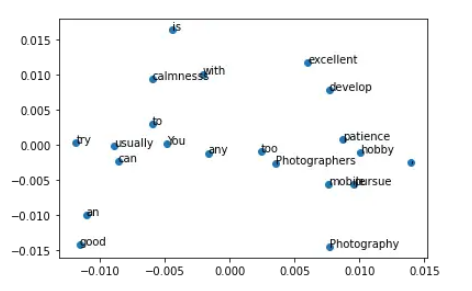

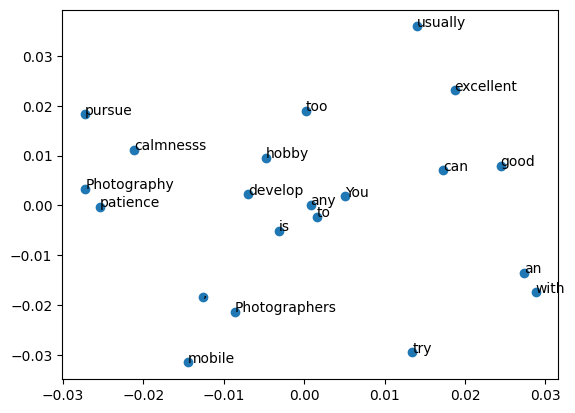

In [3]:
import nltk
# We prepare a list containing lists of tokens of each text
all_tokens=[]
for text in texts:
  tokens=[]
  raw=nltk.wordpunct_tokenize(text.strip())
  for token in raw:
    tokens.append(token)
  all_tokens.append(tokens)

# Import and fit the model with data
from gensim.models import Word2Vec
model=Word2Vec(all_tokens, min_count=1)

# Visualizing the word embedding
from sklearn.decomposition import PCA
from matplotlib import pyplot

col = ['col' + str(i) for i in range(len(model.wv[0]))]
import pandas as pd
import numpy as np

X = pd.DataFrame([], columns=col)
for idx in range(len(model.wv)):
  X.loc[idx] = model.wv[idx]

# PCA down to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(set(sum(all_tokens, [])))
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from gensim.models import Word2Vec

#### 31. How to represent the document using Doc2Vec model?
Difficulty Level : L2

Q. Represent a text document in the form a vector

In [ ]:
texts= [" Photography is an excellent hobby to pursue ",
        " Photographers usually develop patience, calmnesss"
        " You can try Photography with any good mobile too"]

Desired Output:
```
array([ 2.6586275e-03,  3.2867077e-03, -2.0473711e-03,  6.0251489e-04,
       -1.5340233e-03,  1.5060971e-03,  1.0988972e-03,  1.0712545e-03,
       -4.3745534e-03, -4.0448168e-03, -1.8953394e-04, -2.0953947e-04,
       -3.3285557e-03,  1.0409033e-03, -8.5728493e-04,  4.5999791e-03,
        ...(truncated)..
```

In [ ]:
# Importing the model
import gensim
from gensim.models import Doc2Vec

# Preparing data in the format and fitting to the model
all_tokens=[]
for text in texts:
   tokens=[]
   raw=nltk.wordpunct_tokenize(text.strip())
   for token in raw:
      tokens.append(token)
   all_tokens.append(tokens)

def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

my_data = list(tagged_document(all_tokens))
model=Doc2Vec(my_data, min_count=1)

model.infer_vector(['photography','is','an',' excellent ','hobby ','to',' pursue '])

#### 32. How to extract the TF-IDF Matrix ?
Difficulty Level : L3

Q. Extract the TF-IDF (Term Frequency -Inverse Document Frequency) Matrix for the given list of text documents

In [ ]:
text_documents=['Painting is a hobby for many , passion for some',
                'My hobby is coin collection'
                'I do some Painting every now and then']

Desired Output:
```
(0, 13)	0.2511643891128359
(0, 12)	0.35300278529739293
(0, 8)	0.35300278529739293
(0, 5)	0.7060055705947859
(0, 6)	0.2511643891128359
(0, 7)	0.2511643891128359
...(truncated)..
```

In [ ]:
# Using sklearn's TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the vectorizer to our text documents
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text_documents)
print(matrix)

#### 33. How to create bigrams using Gensim’s Phraser ?
Difficulty Level : L3

Q. Create bigrams from the given texts using Gensim library’s Phrases

In [ ]:
documents = ["the mayor of new york was there", "new york mayor was present"]

Desired Output:
```
['the', 'mayor', 'of', 'new york', 'was', 'there']
['new york', 'mayor', 'was', 'present']
```

In [ ]:
# Import Phraser from gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

sentence_stream = [doc.split(" ") for doc in documents]

# Creating bigram phraser
bigram = Phrases(sentence_stream, min_count=1, threshold=2, delimiter=" ")
bigram_phraser = Phraser(bigram)

for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]
    print(tokens_)

#### 34. How to create bigrams, trigrams using ngrams ?
Difficulty Level : L3

Q. Extract all bigrams , trigrams using ngrams of nltk library

In [ ]:
Sentences="Machine learning is a neccessary field in today's world. Data science can do wonders . Natural Language Processing is how machines understand text "

Desired Output:
```
Bigrams are [('machine', 'learning'), ('learning', 'is'), ('is', 'a'), ('a', 'neccessary'), ('neccessary', 'field'), ('field', 'in'), ('in', "today's"), ("today's", 'world.'), ('world.', 'data'), ('data', 'science'), ('science', 'can'), ('can', 'do'), ('do', 'wonders'), ('wonders', '.'), ('.', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', 'is'), ('is', 'how'), ('how', 'machines'), ('machines', 'understand'), ('understand', 'text')]
 Trigrams are [('machine', 'learning', 'is'), ('learning', 'is', 'a'), ('is', 'a', 'neccessary'), ('a', 'neccessary', 'field'), ('neccessary', 'field', 'in'), ('field', 'in', "today's"), ('in', "today's", 'world.'), ("today's", 'world.', 'data'), ('world.', 'data', 'science'), ('data', 'science', 'can'), ('science', 'can', 'do'), ('can', 'do', 'wonders'), ('do', 'wonders', '.'), ('wonders', '.', 'natural'), ('.', 'natural', 'language'), ('natural', 'language', 'processing'), ('language', 'processing', 'is'), ('processing', 'is', 'how'), ('is', 'how', 'machines'), ('how', 'machines', 'understand'), ('machines', 'understand', 'text')]
```

In [ ]:
from nltk import ngrams
bigram=list(ngrams(Sentences.lower().split(),2))
trigram=list(ngrams(Sentences.lower().split(),3))

print(" Bigrams are",bigram)
print(" Trigrams are", trigram)

#### 35. How to detect the language of entered text ?
Difficulty Level : L1

Q. Find out the language of the given text

In [ ]:
text="El agente imprime su pase de abordaje. Los oficiales de seguridad del aeropuerto pasan junto a él con un perro grande. El perro está olfateando alrededor del equipaje de las personas tratando de detectar drogas o explosivos."

Desired Output:
```
{'language': 'es', 'score': 0.9999963653206719}
 El agente imprime su pase de abordaje. {'language': 'es', 'score': 0.9999969081229643} 
```

In [ ]:
# Install spacy's languagedetect library
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
nlp = spacy.load('en_core_web_sm')

@Language.factory('language_detector')
def language_detector(nlp, name):
   return LanguageDetector()

# Add the language detector to the processing pipeline
nlp.add_pipe('language_detector', last=True)

doc = nlp(text)
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
   print(sent, sent._.language)

#### 36. How to merge two tokens as one ?
Difficulty Level : L3

Q. Merge the first name and last name as single token in the given sentence

In [ ]:
text="Robert Langdon is a famous character in various books and movies "

Desired Output:
```
Robert Langdon
is
a
famous
character
in
various
books
and
movies
```

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Using retokenize() method of Doc object to merge two tokens
doc = nlp(text)
with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[0:2])

for token in doc:
  print(token.text)

#### 37. How to extract Noun phrases from a text ?
Difficulty Level : L2

Q. Extract and print the noun phrases in given text document

In [ ]:
text="There is a empty house on the Elm Street"

Expected Output :
```
[a empty house, the Elm Street]
```

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a spacy doc of the text
doc = nlp(text)

# Use `noun_chunks` attribute to extract the Noun phrases
chunks = list(doc.noun_chunks)
chunks

#### 38. How to extract Verb phrases from the text ?
Difficulty Level : L3

Q. Extract the Verb Phrases from the given text

In [ ]:
text=("I may bake a cake for my birthday. The talk will introduce reader about Use of baking")

Desired Output:
```
may bake
will introduce
```

In [ ]:
# # NOT WORKING
# # Import textacy library
# import textacy

# # Regex pattern to identify verb phrase
# pattern = r'<VERB>?<ADV>*<VERB>+'
# doc = textacy.make_spacy_doc(text, lang='en_core_web_sm')

# # Finding matches
# verb_phrases = [_ for _ in textacy.extract.matches.regex_matches(doc, pattern)]

# # Print all Verb Phrase
# for chunk in verb_phrases:
#   print(chunk.text)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

verb_phrases = []
tmp = []
for token in doc:
    if token.pos_ in ["VERB", "AUX"]:
        tmp.append(token.text)
    else:
        if len(tmp) != 0:
            verb_phrases.append(" ".join(tmp))
            tmp = []
for ele in verb_phrases:
    print(ele)

#### 39. How to extract first name and last names present in the document ?
Difficulty Level : L3

Q. Extract any two consecutive Proper Nouns that occour in the text document

In [ ]:
text="Sherlock Holmes and Clint Thomas were good friends. I am a fan of John Mark"

Desired Output:
```
 Sherlock Holmes
 Clint Thomas
 John Mark
```

In [ ]:
# Import and initialize spacy's matcher
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
matcher.add('FULL_NAME', [pattern])

doc=nlp(text)
matches = matcher(doc)
for match_id, start, end in matches:
  span = doc[start:end]
  print(span.text)

#### 40. How to identify named entities in the given text
Difficulty Level : L2

Q. Identify and print all the named entities with their labels in the below text

In [ ]:
text=" Walter works at Google. He lives in London."

Desired Output:
```
 Walter PERSON
 Google ORG
 London GPE
```

In [ ]:
import spacy

# Load spacy modelimport spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text)
# Using the ents attribute of doc, identify labels
for entity in doc.ents:  
   print(entity.text,entity.label_)

#### 41. How to identify all the names of Organizations present in the text with NER ?
Difficulty Level : L2

Q. Identify and extract a list of all organizations/Companies mentioned in the given news article

In [ ]:
text =" Google has released it's new model which has got attention of everyone. Amazon is planning to expand into Food delivery, thereby giving competition . Apple is coming up with new iphone model. Flipkart will have to catch up soon."

Expected Solution
```
['Google', 'Amazon', 'Apple', 'Flipkart']
```

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(text.strip())
list_of_org=[]
for entity in doc.ents:
  if entity.label_=="ORG":
    list_of_org.append(entity.text)

print(list_of_org)

#### 42. How to replace all names of people in the text with ‘UNKNOWN’
Difficulty Level : L3

Q. Identify and replace all the person names in the news article with UNKNOWN

In [ ]:
news=" Walter was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to Walter  and his friend  Pinkman . The arrest was made by inspector Hank"

Desired Output :
```
'  UNKNOWN was arrested yesterday at Brooklyn for murder . The suspicions and fingerprints pointed to UNKNOWN   and his friend   UNKNOWN . The arrest was made by inspector UNKNOWN'
```

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(news)

# Identifying the entities of category 'PERSON'
entities = [entity.text  for entity in doc.ents  if entity.label_=='PERSON']
updated_text=[]

for token in doc:
  if token.text in entities:
    updated_text.append("UNKNOWN")
  else :
    updated_text.append(token.text)

" ".join(updated_text)

#### 43. How to visualize the named entities using spaCy
Difficulty Level : L2

Q. Display the named entities prsent in the given document along with their categories using spacy

In [ ]:
text=" Walter was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to Walter  and his friend  Pinkman . He is from Paris "

Desired output:

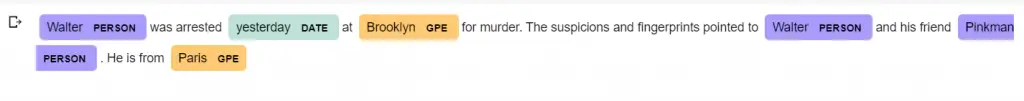

In [ ]:
# Use spacy's displacy with the parameter style="ent"
import spacy
nlp=spacy.load("en_core_web_sm")
from spacy import displacy
doc=nlp(text)
displacy.render(doc,style='ent',jupyter=True)

#### 44. How to implement dependency parsing ?
Difficulty Level : L2

Q. Find the dependencies of all the words in the given text

In [ ]:
text="Mark plays volleyball every evening."

Desired Output :
```
 Mark nsubj
 plays ROOT
 volleyball dobj
 every det
 evening npadvmod
 . punct
```

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
# Using dep_ attribute od tokens in spaCy to access the dependency of the word in sentence.
doc=nlp(text)

for token in doc:
  print(token.text,token.dep_)

#### 45. How to find the ROOT word of any word in a sentence?
Difficulty Level : L3

Q. Find and print the root word / headword of any word in the given sentence

In [ ]:
text="Mark plays volleyball. Sam is not into sports, he paints a lot"

Desired Output :
```
 Mark plays
 plays plays
 volleyball plays
 . plays
 Sam is
 is paints
 not is
 into is
 sports into
 , paints
 he paints
 paints paints
 a lot
 lot paints
```

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
# use the head attribute of tokens to find it's rootword
doc=nlp(text)
for token in doc:
  print(token.text,token.head)

#### 46. How to visualize the dependency tree in spaCy
Difficulty Level : L2

Q. Visualize the dependencies of various tokens of the given text using spaCy

In [ ]:
text="Mark plays volleyball. Sam is not into sports, he paints a lot"

Expected Output:

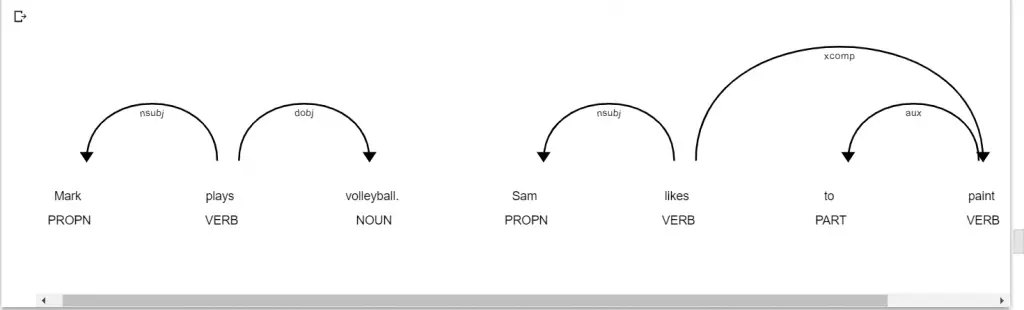

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
# Use spacy's displacy with the parameter style="dep"
doc=nlp(text)

from spacy import displacy
displacy.render(doc,style='dep',jupyter=True)

#### 47. How to detect all the Laptop names present in the text ?
Difficulty Level : L4

Q. Detect all the Laptop names present in the given document .

In [ ]:
text="For my offical use, I prefer lenova. For gaming purposes, I love asus"

Expected Output:
```
lenova laptop
asus laptop
```

In [ ]:
# Import EntityRuler of spacy model
import spacy
nlp=spacy.load("en_core_web_sm")

# Functions to create patterns of laptop name to match
def create_versioned(name):
    return [
        [{'LOWER': name}], 
        [{'LOWER': {'REGEX': f'({name}\d+\.?\d*.?\d*)'}}], 
        [{'LOWER': name}, {'TEXT': {'REGEX': '(\d+\.?\d*.?\d*)'}}]]

def create_patterns():
    versioned_languages = ['dell', 'HP', 'asus','msi','Apple','HCL','sony','samsung','lenova','acer']
    flatten = lambda l: [item for sublist in l for item in sublist]
    versioned_patterns = flatten([create_versioned(lang) for lang in versioned_languages])

    lang_patterns = [
        [{'LOWER': 'dell'}, {'LIKE_NUM': True}],
        [{'LOWER': 'HP'}],
        [{'LOWER': 'asus'}, {'LOWER': '#'}],
        [{'LOWER': 'msi'}, {'LOWER': 'sharp'}],
        [{'LOWER': 'Apple'}],
        [{'LOWER': 'HCL'}, {'LOWER': '#'}],
        [{'LOWER': 'sony'}],
        [{'LOWER': 'samsung'}],
        [{'LOWER': 'toshiba'}],
        [{'LOWER': 'dell'},{'LOWER': 'inspiron'}],
        [{'LOWER': 'acer'},{'IS_PUNCT': True, 'OP': '?'},{'LOWER': 'c'}],
        [{'LOWER': 'golang'}],
        [{'LOWER': 'lenova'}],
        [{'LOWER': 'HP'},{'LOWER':'gaming'}],
        [{'LOWER': 'Fujitsu'}],
        [{'LOWER': 'micromax'}],
    ]

    return versioned_patterns + lang_patterns

# Add the Entity Ruler to the pipeline
from spacy.pipeline import EntityRuler
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns([{'label':'laptop','pattern':p} for p in create_patterns()])

# Identify the car names now
doc=nlp("For my offical use, I prefer lenova. For gaming purposes, I love asus")
for ent in doc.ents:
  print(ent.text,ent.label_)

#### 48. How to summarize text using gensim ?
Difficulty Level : L3

Q. Extract the summary of the given text based using gensim package based on the TextRank Algorithm.

In [ ]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, improve your sex life, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

Desired Output :
```
 As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%.
 No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
 The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
 As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body.
```

In [ ]:
# Importing the summarize function from gensim module
# Cannot use with gensim version > 3.6.0, need to install gensim==3.6.0
%pip install gensim==3.6.0
import gensim
from gensim.summarization.summarizer import summarize

# Pass the document along with desired word count to get the summary
my_summary=summarize(original_text,word_count=100)
print(my_summary)

#### 49. How to summarize text based on the LexRank algorithm ?
Difficulty Level : L3

Q. Extract the summary of the given text based on the TextRank Algorithm.

In [ ]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, improve your sex life, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

Desired Output :
```
 Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma.>, <Sentence: Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves.
```

In [ ]:
from sumy.summarizers.lex_rank import LexRankSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LexRankSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

#### 50. How to summarize text using Luhn algorithm?
Q. Extract the summary of the given text based on the Luhn Algorithm.

Difficulty Level : L3

In [ ]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

Desired Output :
```
  Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.  Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma
```

In [ ]:
from sumy.summarizers.luhn import LuhnSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LuhnSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

#### 51. How to summarize text based on LSA algorithm ?
Difficulty Level : L3

Q. Extract the summary of the given text based on the LSA Algorithm.

In [ ]:
original_text="""Studies show that exercise can treat mild to moderate depression as effectively as antidepressant medication—but without the side-effects, of course. As one example, a recent study done by the Harvard T.H. Chan School of Public Health found that running for 15 minutes a day or walking for an hour reduces the risk of major depression by 26%. In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing.
Exercise is a powerful depression fighter for several reasons. Most importantly, it promotes all kinds of changes in the brain, including neural growth, reduced inflammation, and new activity patterns that promote feelings of calm and well-being. It also releases endorphins, powerful chemicals in your brain that energize your spirits and make you feel good. Finally, exercise can also serve as a distraction, allowing you to find some quiet time to break out of the cycle of negative thoughts that feed depression.
Exercise is not just about aerobic capacity and muscle size. Sure, exercise can improve your physical health and your physique, trim your waistline, and even add years to your life. But that’s not what motivates most people to stay active.
People who exercise regularly tend to do so because it gives them an enormous sense of well-being. They feel more energetic throughout the day, sleep better at night, have sharper memories, and feel more relaxed and positive about themselves and their lives. And it’s also powerful medicine for many common mental health challenges.
Regular exercise can have a profoundly positive impact on depression, anxiety, ADHD, and more. It also relieves stress, improves memory, helps you sleep better, and boosts your overall mood. And you don’t have to be a fitness fanatic to reap the benefits. Research indicates that modest amounts of exercise can make a difference. No matter your age or fitness level, you can learn to use exercise as a powerful tool to feel better.
Ever noticed how your body feels when you’re under stress? Your muscles may be tense, especially in your face, neck, and shoulders, leaving you with back or neck pain, or painful headaches. You may feel a tightness in your chest, a pounding pulse, or muscle cramps. You may also experience problems such as insomnia, heartburn, stomachache, diarrhea, or frequent urination. The worry and discomfort of all these physical symptoms can in turn lead to even more stress, creating a vicious cycle between your mind and body.
Exercising is an effective way to break this cycle. As well as releasing endorphins in the brain, physical activity helps to relax the muscles and relieve tension in the body. Since the body and mind are so closely linked, when your body feels better so, too, will your mind.Evidence suggests that by really focusing on your body and how it feels as you exercise, you can actually help your nervous system become “unstuck” and begin to move out of the immobilization stress response that characterizes PTSD or trauma. 
Instead of allowing your mind to wander, pay close attention to the physical sensations in your joints and muscles, even your insides as your body moves. Exercises that involve cross movement and that engage both arms and legs—such as walking (especially in sand), running, swimming, weight training, or dancing—are some of your best choices.
Outdoor activities like hiking, sailing, mountain biking, rock climbing, whitewater rafting, and skiing (downhill and cross-country) have also been shown to reduce the symptoms of PTSD."""

Desired Output :
```
In addition to relieving depression symptoms, research also shows that maintaining an exercise schedule can prevent you from relapsing. People who exercise regularly tend to do so because it gives them an enormous sense of well-being.
```

In [ ]:
from sumy.summarizers.lsa import LsaSummarizer

#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser=PlaintextParser.from_string(original_text,Tokenizer("english"))

summarizer=LsaSummarizer()
my_summary=summarizer(parser.document,2)
print(my_summary)

#### 52. How to convert documents into json format ?
Difficulty Level : L3

Q. Covert the given text documents into json format for spacy usage

In [ ]:
text1="Netflix has released a new series"
text2="It was shot in London"
text3="It is called Dark and the main character is Jonas"
text4="Adam is the evil character"

Desired Output :
```
{'id': 0,
 'paragraphs': [{'cats': [],
   'raw': 'Netflix has released a new series',
   'sentences': [{'brackets': [],
     'tokens': [{'dep': 'nsubj',
       'head': 2,
       'id': 0,
       'ner': 'U-ORG',
       'orth': 'Netflix',
       'tag': 'NNP'},
      {'dep': 'aux',
       'head': 1,
       'id': 1,
       'ner': 'O',
       'orth': 'has',
       'tag': 'VBZ'},
      {'dep': 'ROOT',
       'head': 0,
       'id': 2,
       'ner': 'O',
       'orth': 'released',
       'tag': 'VBN'},
      {'dep': 'det', 'head': 2, 'id': 3, 'ner': 'O', 'orth': 'a', 'tag': 'DT'},
      {'dep': 'amod',
       'head': 1,
       'id': 4,
       'ner': 'O',
       'orth': 'new',
       'tag': 'JJ'},
      {'dep': 'dobj',
       'head': -3,
       'id': 5,
       'ner': 'O',
       'orth': 'series',
       'tag': 'NN'}]}]},
    ...(truncated)
```

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")

# Covert into spacy documents
doc1=nlp(text1)
doc2=nlp(text2)
doc3=nlp(text3)
doc4=nlp(text4)

# Import docs_to_json
# spacy.gold.docs_to_json is depricated. Cannot use with current version
# from spacy.gold import docs_to_json
from spacy.tokens import Doc

import json
formatt = json.dumps(doc1.to_json(), indent=2)
print(formatt)

#### 53. How to build a text classifier with TextBlob ?
Difficulty Level : L3

Q Build a text classifier with available train data using textblob library

In [ ]:
# Data to train the classifier
train = [
    ('I love eating sushi','food-review'),
    ('This is an amazing place!', 'Tourist-review'),
    ('Pizza is my all time favorite food','food-review'),
    ('I baked a cake yesterday, it was tasty', 'food-review'),
    ("What an awesome taste this sushi has", 'food-review'),
    ('It is a perfect place for outing', 'Tourist-review'),
    ('This is a nice picnic spot', 'Tourist-review'),
    ("Families come out on tours here", 'Tourist-review'),
    ('It is a beautiful place !', 'Tourist-review'),
    ('The place was warm and nice', 'Tourist-review')
]
test = [
    ('The sushi was good', 'food-review'),
    ('The place was perfect for picnics ', 'Tourist-review'),
    ("Burgers are my favorite food", 'food-review'),
    ("I feel amazing!", 'food-review'),
    ('It is an amazing place', 'Tourist-review'),
    ("This isn't a very good place", 'Tourist-review')
]

Desired Output :
```
Accuracy: 0.8333333333333334
```

In [ ]:
# Importing the classifier
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob

# Training
cl = NaiveBayesClassifier(train)

# Classify some text
print(cl.classify("My favorite food is spring rolls"))  
print(cl.classify("It was a cold place for picnic"))  

# Printing accuracy of classifier
print("Accuracy: {0}".format(cl.accuracy(test)))

#### 54. How to train a text classifier using Simple transformers ?
Difficulty Level : L4

Q. Build and train a text classifier for the given data using simpletransformers library

In [ ]:
train_data = [
    ["The movie was amazing", 1],
    ["It was a boring movie", 0],
    ["I had a great experience",1],
    ["I was bored during the movie",0],
    ["The movie was great",1],
    ["The movie was bad",0],
    ["The movie was good",1]
]

In [ ]:
# Import requirements
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data

train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=5)

# Create a ClassificationModel
model = ClassificationModel("bert", "bert-base-uncased", args=model_args,use_cuda=False)

# Train the model
model.train_model(train_df)


# Make predictions with the model
predictions, raw_outputs = model.predict(["The titanic was a good movie"])

predictions

#### 55. How to perform text classification using spaCy ?
Difficulty Level : L4

Q. Build a text classifier using spacy that can classify IMDB reviews as positive or negative

In [ ]:
# # NOT WORKING
# import spacy
# nlp=spacy.load("en_core_web_sm")


# textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True, "architecture": "simple_cnn"})
# nlp.add_pipe(textcat, last=True)
# textcat = nlp.get_pipe("textcat")

# # add label to text classifier
# textcat.add_label("POSITIVE")
# textcat.add_label("NEGATIVE")


# def load_data(limit=0, split=0.8):
#     """Load data from the IMDB dataset."""
#     # Partition off part of the train data for evaluation
#     train_data, _ = thinc.extra.datasets.imdb()
#     random.shuffle(train_data)
#     train_data = train_data[-limit:]
#     texts, labels = zip(*train_data)
#     cats = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in labels]
#     split = int(len(train_data) * split)
#     return (texts[:split], cats[:split]), (texts[split:], cats[split:])


# # load the IMDB dataset
# print("Loading IMDB data...")
# (train_texts, train_cats), (dev_texts, dev_cats) = load_data()
# train_texts = train_texts[:n_texts]
# train_cats = train_cats[:n_texts]
    
# train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))

# # get names of other pipes to disable them during training
# pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
# other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# # Training the text classifier
# with nlp.disable_pipes(*other_pipes):  # only train textcat
#    optimizer = nlp.begin_training()
#    if init_tok2vec is not None:
#       with init_tok2vec.open("rb") as file_:
#         textcat.model.tok2vec.from_bytes(file_.read())
#         print("Training the model...")
#         print("{:^5}\t{:^5}\t{:^5}\t{:^5}".format("LOSS", "P", "R", "F"))
#         batch_sizes = compounding(4.0, 32.0, 1.001)
#         for i in range(n_iter):
#             losses = {}
#             # batch up the examples using spaCy's minibatch
#             random.shuffle(train_data)
#             batches = minibatch(train_data, size=batch_sizes)
#             for batch in batches:
#                 texts, annotations = zip(*batch)
#                 nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)

#### 56. How to translate the text (using simpletransformers) ?
Difficulty Level : L3

Q. Translate the given list of texts from English to Dutch using simpletransformers package

In [ ]:
['Our experienced writers travel the world to bring you informative and inspirational features, destination roundups, travel ideas, tips and beautiful photos in order to help you plan your next holiday',
                  'Each part of Germany is different, and there are thousands of memorable places to visit.',
                  "Christmas Markets originated in Germany, and the tradition dates to the Late Middle Ages.",
                  "Garmisch-Partenkirchen is a small town in Bavaria, near Germany’s highest mountain Zugspitze, which rises to 9,718 feet (2,962 meters)",
                  "It’s one of the country’s top alpine destinations, extremely popular during the winter",
                  "In spring, take a road trip through Bavaria and enjoy the view of the dark green Alps and the first alpine wildflowers. "]

Desired Output :
```
['Unsere erfahrenen Autoren reisen die Welt, um Ihnen informative und inspirierende Funktionen, Destination Rund',
'Jeder Teil Deutschlands ist anders, und es gibt Tausende von denkwürdigen Orten zu besuchen.',
'Weihnachtsmärkte entstanden in Deutschland, und die Tradition stammt aus dem späten Mittelalter.',
'Garmisch-Partenkirchen ist eine kleine Stadt in Bayern, nahe Deutschland.Die Zug',
'Es ist eines der Top-Alpenziele des Landes, sehr beliebt im Winter',
'Im Frühjahr machen Sie eine Roadtrip durch Bayern und genießen den Blick auf die dunkelgrünen Alpen']
```

In [ ]:
# Import the model
from simpletransformers.seq2seq import Seq2SeqModel

# Setting desired arguments
my_args = {    "train_batch_size": 2,
               "num_train_epochs": 10,
               "save_eval_checkpoints": False,
               "save_model_every_epoch": False,
               "evaluate_during_training": True,
               "evaluate_generated_text": True   }

# Instantiating the model
my_model=Seq2SeqModel(encoder_decoder_name="Helsinki-NLP/opus-mt-en-de",encoder_decoder_type="marian",args=my_args,use_cuda=False)


# translating the text

my_model.predict(['Our experienced writers travel the world to bring you informative and inspirational features, destination roundups, travel ideas, tips and beautiful photos in order to help you plan your next holiday',
                  'Each part of Germany is different, and there are thousands of memorable places to visit.',
                  "Christmas Markets originated in Germany, and the tradition dates to the Late Middle Ages.",
                  "Garmisch-Partenkirchen is a small town in Bavaria, near Germany’s highest mountain Zugspitze, which rises to 9,718 feet (2,962 meters)",
                  "It’s one of the country’s top alpine destinations, extremely popular during the winter",
                  "In spring, take a road trip through Bavaria and enjoy the view of the dark green Alps and the first alpine wildflowers. "])

#### 57. How to create a Question-Answering system from given context
Difficulty Level : L4

Q. Build a Question Answering model that answers questions from the given context using transformers package

In [ ]:
context=""" Harry Potter is the best book series according to many people. Harry Potter was written by JK.Rowling .
It is afantasy based novel that provides a thrilling experience to readers."""

question="What is Harry Potter ?"

Desired Output :
```
{'score': 0.2375375191101107, 'start': 17, 'end': 37, 'answer': 'the best book series'}
```

In [ ]:
#Install and import the pipeline of transformers
from transformers import pipeline

# Get thetask-specific pipeline
my_model=pipeline(task="question-answering")

context = r""" Harry Potter is the best book series according to many people. Harry Potter was written by JK.Rowling .
It is afantasy based novel that provides a thrilling experience to readers."""

# Pass the question and context to the model to obtain answer
print(my_model(question="What is Harry Potter ?", context=context))
print(my_model(question="Who wrote Harry Potter ?", context=context))

#### 58. How to do text generation starting from a given piece of text?
Difficulty Level : L4

Q. Generate text based on the the starting provided.

In [ ]:
starting="It was a bright"

Desired Output :
```
'It was a bright day in New Jersey\'s capitol," the senator told a reporter after the rally. "It\'s a sunny day in New Hampshire, there\'s a great deal of sunshine.'
```

In [ ]:
# Import pipeline from transformers package
from transformers import pipeline

# Get the task-specific pipeline
my_model=pipeline(task="text-generation")

# Pass the starting sequence as input to generate text
my_model(starting)

#### 59. How to classify a text as positive or negative sentiment with transformers?
Difficulty Level : L4

Q. Find out whether a given text is postive or negative sentiment along with score for predictions

In [ ]:
text1="It is a pleasant day, I am going for a walk"
text2="I have a terrible headache"

Desired Output :
```
[{'label': 'POSITIVE', 'score': 0.9998570084571838}]
[{'label': 'NEGATIVE', 'score': 0.9994378089904785}]
```

In [ ]:
# Import pipeline from transformers package
from transformers import pipeline

# Get the task specific pipeline
my_model = pipeline("sentiment-analysis")

# Predicting the sentiment with score
print(my_model(text1))
print(my_model(text2))